In [1]:
import os
import data_loader
from criteria import PSNR, SSIM, show_img_in_loader_and_comparison, test_psnr_ssim_interpolation
from plot import show_img
from DCSCN_model import get_DCSCN_model, test_one_picture_in_val_set, DCSCN_train

#### path define

In [2]:
base_path = r"D:\programming\dataset\DIV2K"
valid_hr = os.path.join(base_path, "DIV2K_valid_HR")
valid_lr = os.path.join(base_path, "DIV2K_valid_LR_bicubic_X2")
h5_train_path = os.path.join(base_path, "Y_channel_data_ESPCN")
model_save_path = os.path.join(base_path, "DCSCN.model")

#### data loader

In [3]:
train_dataloader, val_dataloader = data_loader.create_train_val_data_loader(h5_train_path, valid_hr, valid_lr)

#### define net

In [4]:
model, device, current_epoch, PSNR_list, SSIM_list = get_DCSCN_model(model_save_path=model_save_path)

load model parameter
use device:  cuda:0


#### train

In [5]:
DCSCN_train(model, device, train_dataloader, val_dataloader,
               current_epoch, PSNR_list, SSIM_list, model_save_path,
               max_epoch=21)

100%|████████████████████████████████████████████████████████████████████████████| 45654/45654 [10:42<00:00, 71.01it/s]


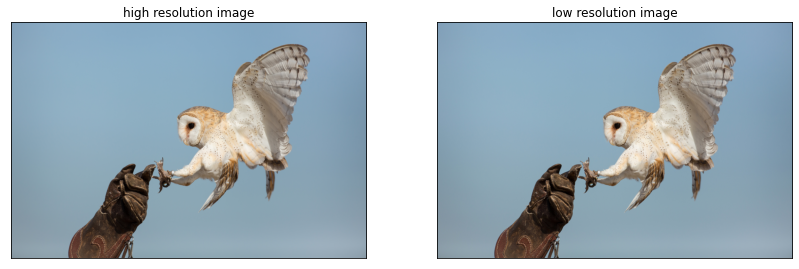

Y channel PSNR value after interpolation: 40.268
Y channel PSNR value after DCSCN: 40.298
Y channel SSIM value after interpolation: 0.974
Y channel SSIM value after DCSCN: 0.975


In [6]:
test_one_picture_in_val_set(model, device, val_dataloader, save_dir="save_img",
                            img_number=1)